In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from musicalrobot import irtemp
from musicalrobot import edge_detection as ed
from musicalrobot import edge_detection_MN as ednew

# Load bolometry images

In [11]:
crop_frames = ednew.fixed_crop_the_file('musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')
crop_frames2 = ednew.fixed_crop_the_file('musicalrobot/data/10_17_19_DDA_shallow_plate.tiff')
# crop_frames3 = ednew.fixed_crop_the_file('musicalrobot/data/8_15_19_Dodecanoic_acid.tiff')

## Read the file by old version

In [12]:
sorted_regprops, s_temp, p_temp, inf_temp, m_df = ed.inflection_temp(crop_frames, 3, 3)
sorted_regprops2, s_temp2, p_temp2, inf_temp2, m_df2 = ed.inflection_temp(crop_frames2, 3, 3)
# sorted_regprops3, s_temp3, p_temp3, inf_temp3, m_df3 = ed.inflection_temp(crop_frames3, 3, 4)

## Read the file by new version

In [6]:
sorted_regprops_v2, s_temp_v2, p_temp_v2, inf_temp_v2, m_df_v2 = ednew.inflection_temp(crop_frames, 3, 3, 2)
# sorted_regprops_v2_2, s_temp_v2_2, p_temp_v2_2, inf_temp_v2_2, m_df_v2_2 = ednew.inflection_temp(crop_frames2, 3, 3, 2)
# sorted_regprops_v2_3, s_temp_v2_3, p_temp_v2_3, inf_temp_v2_3, m_df_v2_3 = ednew.inflection_temp(crop_frames3, 3, 4, 2)

KeyboardInterrupt: 

## Standard Deviation Differences between the old version and the new version
#### Calculate and plot std of sample temperatures at each frame

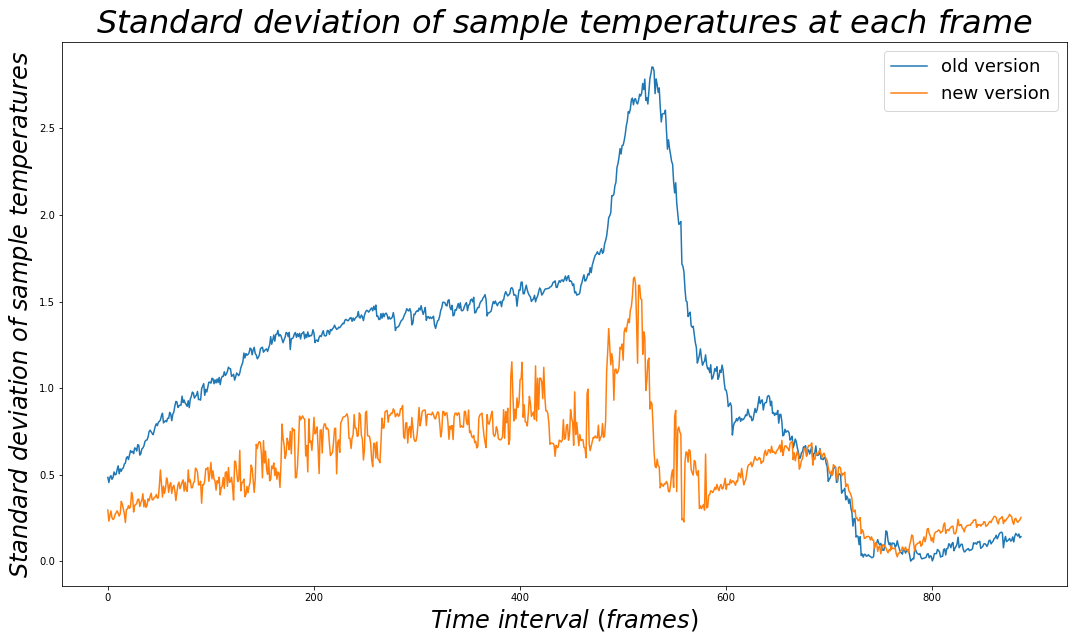

In [5]:
std_old = []
std_new = []
for i in range(len(s_temp[0])):
    total_old = 0
    total_new = 0
    for x in range(len(s_temp)):
        total_old += s_temp[x][i]
        total_new += s_temp_v2[x][i]
    mean_old = total_old/len(s_temp)
    mean_new = total_new/len(s_temp_v2)
    for x in range(len(s_temp)):
        mean_square_old = np.mean(np.abs(s_temp[x][i] - mean_old)**2)
        mean_square_new = np.mean(np.abs(s_temp_v2[x][i] - mean_new)**2)
    std_old.append(np.sqrt(mean_square_old))
    std_new.append(np.sqrt(mean_square_new))
sample_temp = plt.figure(figsize=(18,10))
ax = sample_temp.add_subplot()
ax.plot(range(len(s_temp[0])), std_old, label='old version')
ax.set_title("$Standard$ $deviation$ $of$ $sample$ $temperatures$ $at$ $each$ $frame$", fontsize=32)
ax.set_xlabel("$Time$ $interval$ $(frames)$", fontsize=24)
ax.set_ylabel("$Standard$ $deviation$ $of$ $sample$ $temperatures$", fontsize=24)
ax.plot(range(len(s_temp[0])), std_new, label='new version')
ax.set_title("$Standard$ $deviation$ $of$ $sample$ $temperatures$ $at$ $each$ $frame$", fontsize=32)
ax.set_xlabel("$Time$ $interval$ $(frames)$", fontsize=24)
ax.set_ylabel("$Standard$ $deviation$ $of$ $sample$ $temperatures$", fontsize=24)
plt.legend(fontsize=18)
plt.show()

#### Temperature at inflection points (melting temperature)

In [6]:
std_melt_temp = np.std(inf_temp)
std_melt_temp_v2 = np.std(inf_temp_v2)
mean_melt_temp = np.mean(inf_temp)
mean_melt_temp_v2 = np.mean(inf_temp_v2)
print("Old version:")
print("standard deviation of melting temperature: " + str(std_melt_temp))
print("mean of melting temperature: " + str(mean_melt_temp))
print("New version:")
print("standard deviation of melting temperature: " + str(std_melt_temp_v2))
print("mean of melting temperature: " + str(mean_melt_temp_v2))

Old version:
standard deviation of melting temperature: 3.1330883592178957
mean of melting temperature: 42.232
New version:
standard deviation of melting temperature: 1.8598895011874494
mean of melting temperature: 47.94692023478938
